In [1]:
import os
import traceback
import numpy
from pydub import AudioSegment
from matplotlib import pyplot as plt
import librosa.display
import librosa
import cv2
from skimage.color import rgb2gray
formats_to_convert = ['.m4a']
FIG_SIZE = (2.56, 1.40)

C:\Users\jaehee\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [51]:
def wav2sepc():
    for i in range(1,6):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/living_room/living_room"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/living_room/living_room'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [52]:
def wav2sepc2():
    for i in range(1,9):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/tv_on/tv"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/tv_on/tv'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [53]:
def wav2sepc3():
    for i in range(1,7):
        plt.figure(figsize=FIG_SIZE)
        audio, sampling_rate = librosa.load("C:/Users/jaehee/.keras/datasets/new_wav_data/weather/weather"+ str(i) +".wav")
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=256, hop_length=128, fmax=8000)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=numpy.max)
        plt.gca().set_axis_off()
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(mel_spectrogram)
        plt.savefig('C:/Users/jaehee/.keras/datasets/new_spec_data/weather/weather'+str(i)+'.png', bbox_inches='tight',pad_inches=0)

In [5]:
def pre_denoise(file_name):
    for i in range(1,501):
        plt.figure(figsize=FIG_SIZE)
        img = cv2.imread('C:/Users/jaehee/.keras/datasets/final_gray_log_mel_spec_data/'+file_name+'/'+file_name+'('+str(i)+').png')
        dst = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 21)
        gray = rgb2gray(dst)
        plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
        plt.margins(0, 0)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
        plt.savefig('C:/Users/jaehee/.keras/datasets/final_gray_log_mel_spec_data/'+file_name+'/'+file_name+'('+str(i)+').png', )

In [6]:
pre_denoise('morning')

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\photo\src\denoising.cpp:178: error: (-5:Bad argument) Type of input image should be CV_8UC3 or CV_8UC4! in function 'cv::fastNlMeansDenoisingColored'


<Figure size 184.32x100.8 with 0 Axes>

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

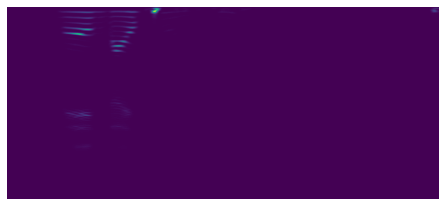

In [8]:
def specAug_run(dir_path):
    for root, subdirs, files in os.walk('C:/Users/jaehee/.keras/datasets/final_wav_data/'+ dir_path):
        for fname in files:
            full_fname = os.path.join(root, fname)
            audio, sampling_rate = librosa.load(full_fname)

            mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sampling_rate,n_mels=256, hop_length=128,fmax=8000)
            #mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
            plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
            plt.margins(0, 0) 
            plt.gca().set_axis_off(
            )
            plt.gca().xaxis.set_major_locator(plt.NullLocator())
            plt.gca().yaxis.set_major_locator(plt.NullLocator())
            plt.imshow(mel_spectrogram)
            plt.savefig('C:/Users/jaehee/.keras/datasets/final_mel_spec_data/'+ dir_path+'/'+ fname + '_vs2.png', bbox_inches='tight', pad_inches=0)
specAug_run('weather')

In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt 

min_level_db= -100
def normalize_mel(S):
    return np.clip((S-min_level_db)/-min_level_db,0,1)


def feature_extraction(path):
    y = librosa.load(path,16000)[0]
    S =  librosa.feature.melspectrogram(y=y, n_mels=80, n_fft=512, win_length=400, hop_length=160) # 320/80
    norm_log_S = normalize_mel(librosa.power_to_db(S, ref=np.max))
    return norm_log_S
                        

a = feature_extraction('weather_vs2.png.wav')
librosa.display.specshow(a, y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.savefig('Mel-Spectrogram example.png')
plt.show()